In [1]:
import pandas as pd
import zipfile

C:\Users\kiokh\AppData\Local\Temp\ipykernel_18852\1290024744.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
with zipfile.ZipFile('spam_detection.zip','r') as zip_f:
    zip_f.extractall('spam_detection')

In [4]:
spam_data=pd.read_csv('spam_detection/spam.csv',encoding='latin1')

In [5]:
spam_data.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
spam_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
spam_df=spam_data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [8]:
spam_df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
spam_df['v1'] = encoder.fit_transform(spam_df['v1'])

In [11]:
spam_df.head()
spam_df.isnull().sum()

v1    0
v2    0
dtype: int64

In [12]:
spam_df.duplicated().sum()

403

In [13]:
spam_df=spam_df.drop_duplicates(keep='first')
spam_df.duplicated().sum()

0

In [14]:
spam_df.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
spam_df['num_character'] = spam_df['v2'].apply(len)
pip  install nltk
import nltk
nltk.download('punkt')
spam_df['num_words'] = spam_df['v2'].apply(lambda x:len(nltk.word_tokenize(x)))
spam_df['num_sentence'] = spam_df['v2'].apply(lambda x : len(nltk.sent_tokenize(x)))
spam_df.head()

'pip' is not recognized as an internal or external command,
operable program or batch file.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kiokh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,v1,v2,num_character,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [16]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
import string

def transformTexts(text):
    text = text.lower()
    #tokenizing the text based on the words in the text
    text = nltk.word_tokenize(text)
    #including all those characters which are alphabet or number
    y = []
    for i in text:
        if i.isalnum:
            y.append(i)
            
    #storing the value of y into the vaiable text
    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    #the last step is nothing but steming in the steming we basically convert every verb form into the simple form such as
    #if we have dancing or danced we will convert them into dance and so on for this need to import something  hehehehe
    
    text = y[:]
    y.clear()
    ps = PorterStemmer()
    
    for i in text:
        y.append(ps.stem(i))
    
    text = y[:]
    y.clear()
    
    return " ".join(text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kiokh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [17]:
transformTexts('Hi Shehriar how are you? Did you eat my salad?And if you are dancing tell me I danced very well last time')

'hi shehriar eat salad danc tell danc well last time'

In [18]:
spam_df['transformed'] = spam_df['v2'].apply(transformTexts)

In [19]:
spam_df.head()

,v1,v2,num_character,num_words,num_sentence,transformed
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi .. avail bugi n great wo...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar ... joke wif u oni ...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor ... u c alreadi say ...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah n't think goe usf live around though


In [23]:
pip install wordcloud


   ---------------------------------------- 0.0/300.0 kB ? eta -:--:--
   ----- ---------------------------------- 41.0/300.0 kB 1.9 MB/s eta 0:00:01
   ----- ---------------------------------- 41.0/300.0 kB 1.9 MB/s eta 0:00:01
   ----- ---------------------------------- 41.0/300.0 kB 1.9 MB/s eta 0:00:01
   ------- ------------------------------- 61.4/300.0 kB 252.2 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/300.0 kB 403.5 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/300.0 kB 403.5 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/300.0 kB 403.5 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/300.0 kB 403.5 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/300.0 kB 403.5 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/300.0 kB 403.5 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/300.0 kB 403.5 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/300

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


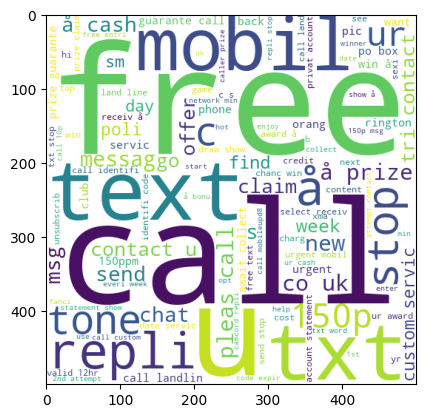

In [24]:

from wordcloud import WordCloud
import matplotlib.pyplot as plt
wc = WordCloud(width = 500,height = 500,min_font_size = 10,background_color = 'white')
spam_wc = wc.generate(spam_df[spam_df['v1'] == 1]['transformed'].str.cat(sep = " "))
plt.imshow(spam_wc)

In [25]:
spam_corpus = []
for msg in spam_df[spam_df['v1']==1]['transformed'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        
#same for the ham messages 
ham_corpus = []
for msg in spam_df[spam_df['v1']==0]['transformed'].tolist():
    for word in msg:
        ham_corpus.append(word)

In [26]:
spam_corpus_df = pd.DataFrame(spam_corpus)
spam_corpus_df.head()

,0
0,free
1,entri
2,2
3,wkli
4,comp


In [27]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)
gb = GaussianNB()
mb = MultinomialNB()
bb = BernoulliNB()

#seperating X and y
X = tfidf.fit_transform(spam_df['transformed']).toarray()
y = spam_df['v1']
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)
X_train.shape

(4135, 3000)

In [29]:
mb.fit(X_train, y_train)
mb.score(X_train, y_train)

0.9842805320435308

In [30]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mb, open('model.pkl', 'wb'))